In [1]:
from music21.note import Note
import seaborn as sns
import matplotlib.pyplot as plt
from annotation_parser import parseAnnotation
from score_parser import parseScore
from common import TAVERNVERSIONS

In [2]:
def getAnnotationOffsets(a):
    annotationIndexes = a[a.isOnset].pitchNames.index.to_list()
    annotationNotes = a[a.isOnset].pitchNames.to_list()
    annotationText = a[a.isOnset].romanNumeral.to_list()
    annotationIndexes.append('end')
    annotationRanges = [(annotationIndexes[i], annotationIndexes[i+1], annotationNotes[i], annotationText[i]) for i in range(len(annotationNotes))]
    return annotationRanges

In [3]:
def getNonChordSequence(annotationRanges, s):
    nonChordToneSequence = []
    for start, end, annotationNotes, _ in annotationRanges:
#         print(start, end)
        if end == "end":
            slices = s[start:]
        else:
            slices = s[start:end]
        originalNotes = slices.notes.to_list()
        originalNoteNames = [Note(n).name for chord in originalNotes for n in chord]
        nonChordTones = set(originalNoteNames) - set(annotationNotes)
        missingNotes = set(annotationNotes) - set(originalNoteNames)
        originalNonChord = [n for n in originalNoteNames if n in nonChordTones]
        if not originalNotes:
            missingNotesFactor = 1.0
            nonChordToneFactor = 1.0
        else:
            missingNotesFactor = len(missingNotes) / len(set(annotationNotes))
            nonChordToneFactor = len(originalNonChord) / len(originalNoteNames)
#         print('original notes:', originalNoteNames)
#         print('notes implied by annotation:', annotationNotes)
#         print('potential non-chord tones:', originalNonChord)
#         print('missing notes from annotation:', missingNotesFactor)
#         print(start, end, annotationNotes, nonChordToneFactor)
        nonChordToneSequence.append(missingNotesFactor * nonChordToneFactor)
    return nonChordToneSequence

When-in-Rome/Corpus/Variations_and_Grounds/Mozart,_Wolfgang_Amadeus/_/K455/analysis_A.txt TAVERN/Mozart/K455/Krn/K455.krn
score:  128.1214321355763
(0.0, 2.0): I			0.07
(2.0, 4.0): V			0.22
(4.0, 6.0): vi			0.04
(6.0, 8.0): V			0.07
(8.0, 9.0): IV			0.0
(9.0, 10.0): viio			0.0
(10.0, 12.0): I			0.0
(12.0, 13.0): V7			0.0
(13.0, 16.0): I			0.0
(16.0, 18.0): V7/ii			0.0
(18.0, 20.0): i/ii			0.0
(20.0, 22.0): V/ii			0.0
(22.0, 24.0): ii			0.05
(24.0, 28.0): V7			0.0
(28.0, 30.0): V			0.0
(30.0, 32.0): I			0.0
(32.0, 34.0): I			0.07
(34.0, 36.0): V			0.22
(36.0, 38.0): vi			0.04
(38.0, 40.0): V			0.02
(40.0, 41.0): viio			0.0
(41.0, 42.0): viio			0.0
(42.0, 44.0): I			0.0
(44.0, 45.0): V7			0.0
(45.0, 48.0): I			0.0
(48.0, 50.0): I			0.0
(50.0, 52.0): V			0.0
(52.0, 54.0): viio/V			0.0
(54.0, 56.0): V			0.0
(56.0, 57.0): IV			0.0
(57.0, 58.0): IV			0.0
(58.0, 59.0): I			0.04
(59.0, 60.0): I			0.0
(60.0, 61.0): V			0.0
(61.0, 64.0): I			0.08
(64.0, 66.0): V7/ii			0.0
(66.0, 67.0): i/ii			0.

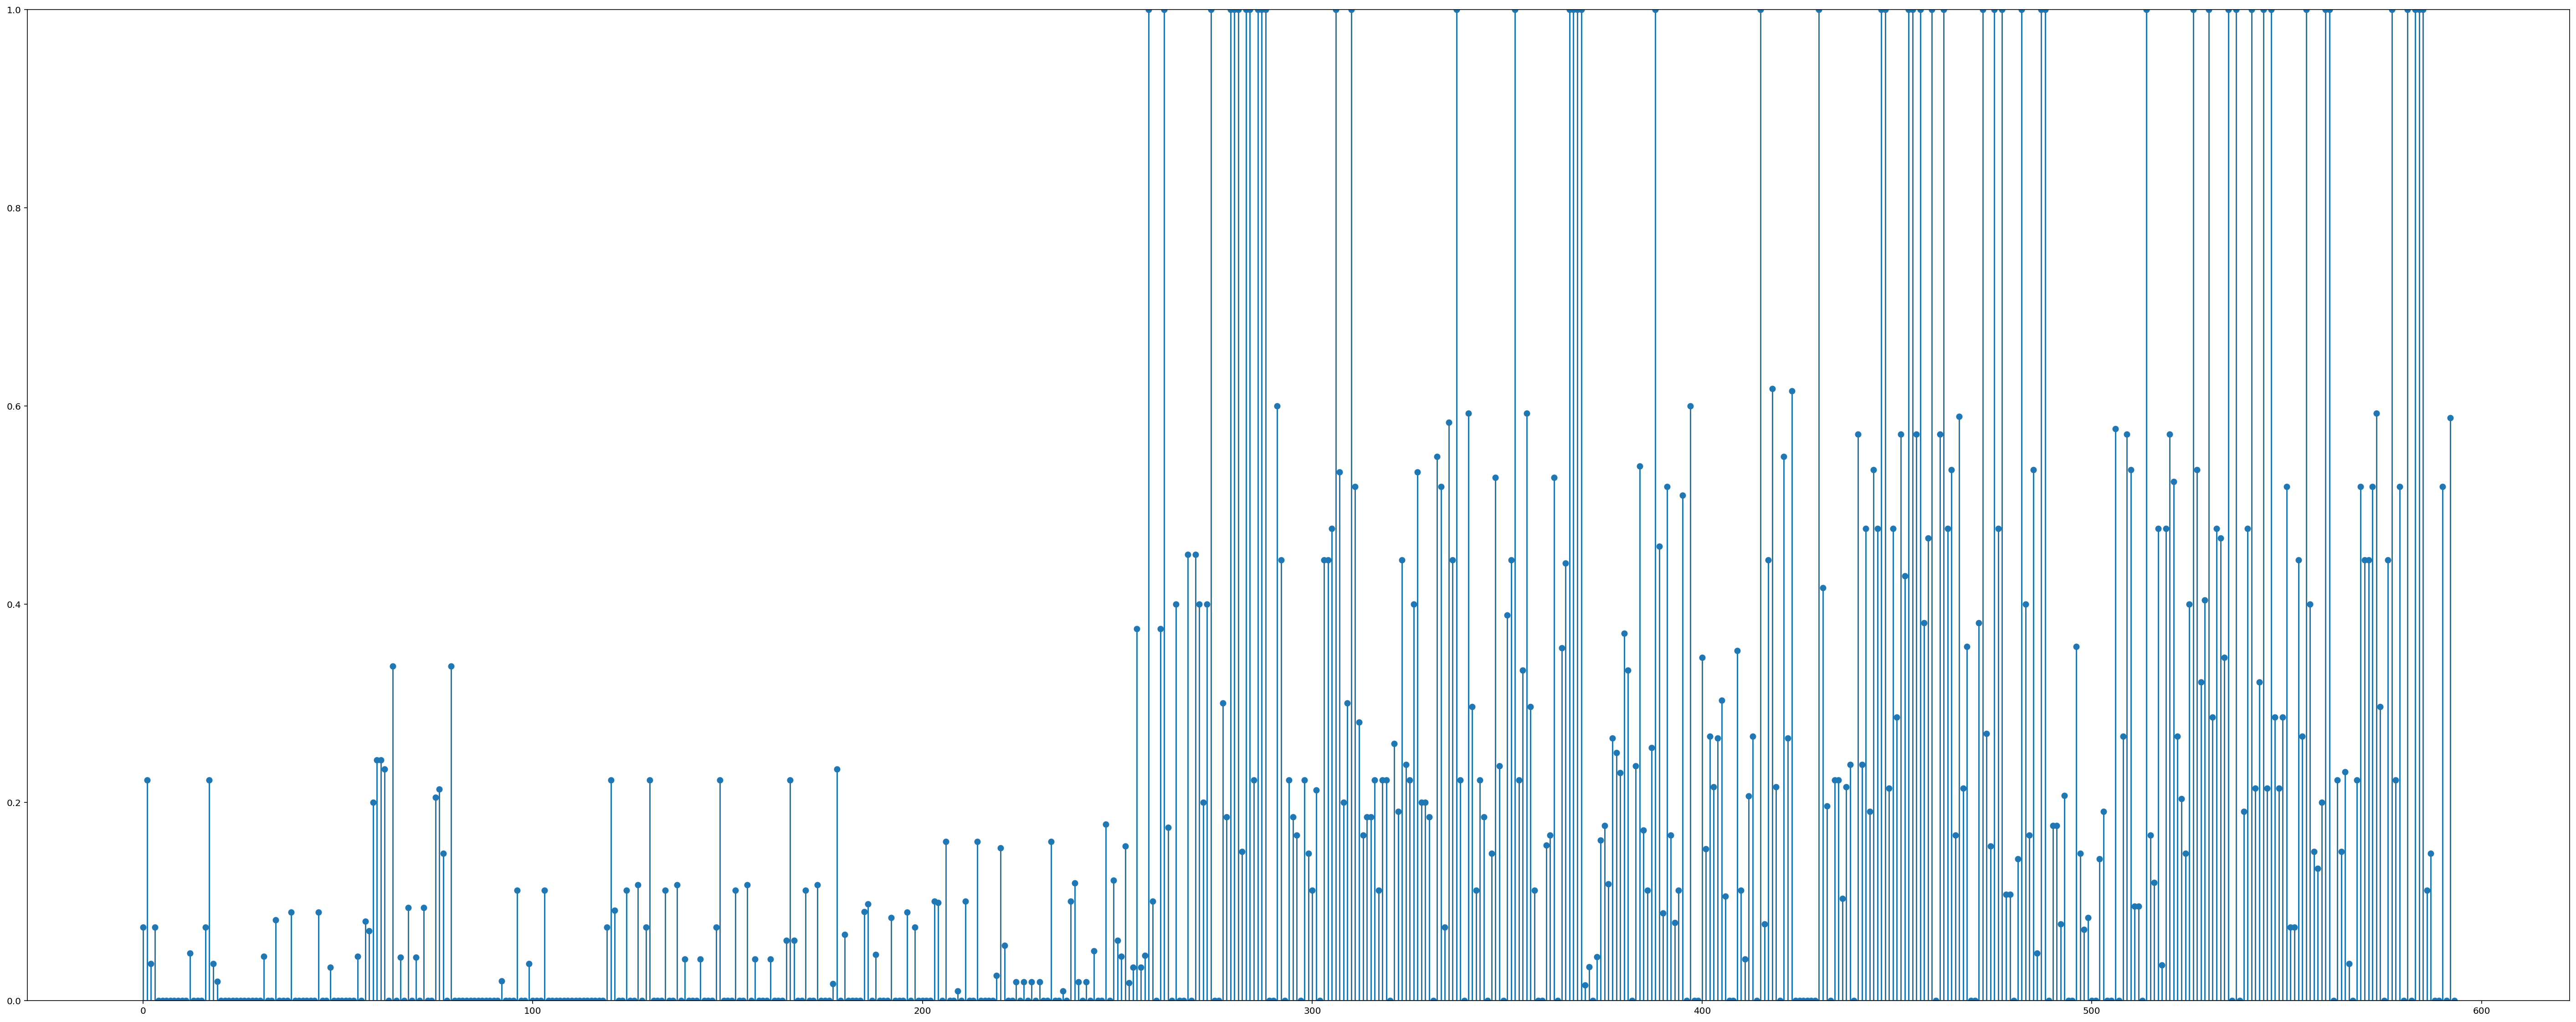

When-in-Rome/Corpus/Variations_and_Grounds/Mozart,_Wolfgang_Amadeus/_/K455/analysis_A.txt functional-harmony-micchi/data/Tavern/Mozart/scores/K455.mxl
score:  30.726812952646757
(0.0, 2.0): I			0.07
(2.0, 4.0): V			0.22
(4.0, 6.0): vi			0.04
(6.0, 8.0): V			0.07
(8.0, 9.0): IV			0.0
(9.0, 10.0): viio			0.0
(10.0, 12.0): I			0.0
(12.0, 13.0): V7			0.0
(13.0, 16.0): I			0.0
(16.0, 18.0): V7/ii			0.0
(18.0, 20.0): i/ii			0.0
(20.0, 22.0): V/ii			0.0
(22.0, 24.0): ii			0.05
(24.0, 28.0): V7			0.0
(28.0, 30.0): V			0.0
(30.0, 32.0): I			0.0
(32.0, 34.0): I			0.07
(34.0, 36.0): V			0.22
(36.0, 38.0): vi			0.04
(38.0, 40.0): V			0.02
(40.0, 41.0): viio			0.0
(41.0, 42.0): viio			0.0
(42.0, 44.0): I			0.0
(44.0, 45.0): V7			0.0
(45.0, 48.0): I			0.0
(48.0, 50.0): I			0.0
(50.0, 52.0): V			0.0
(52.0, 54.0): viio/V			0.0
(54.0, 56.0): V			0.0
(56.0, 57.0): IV			0.0
(57.0, 58.0): IV			0.0
(58.0, 59.0): I			0.04
(59.0, 60.0): I			0.0
(60.0, 61.0): V			0.0
(61.0, 64.0): I			0.08
(64.0, 66.0): V7/ii

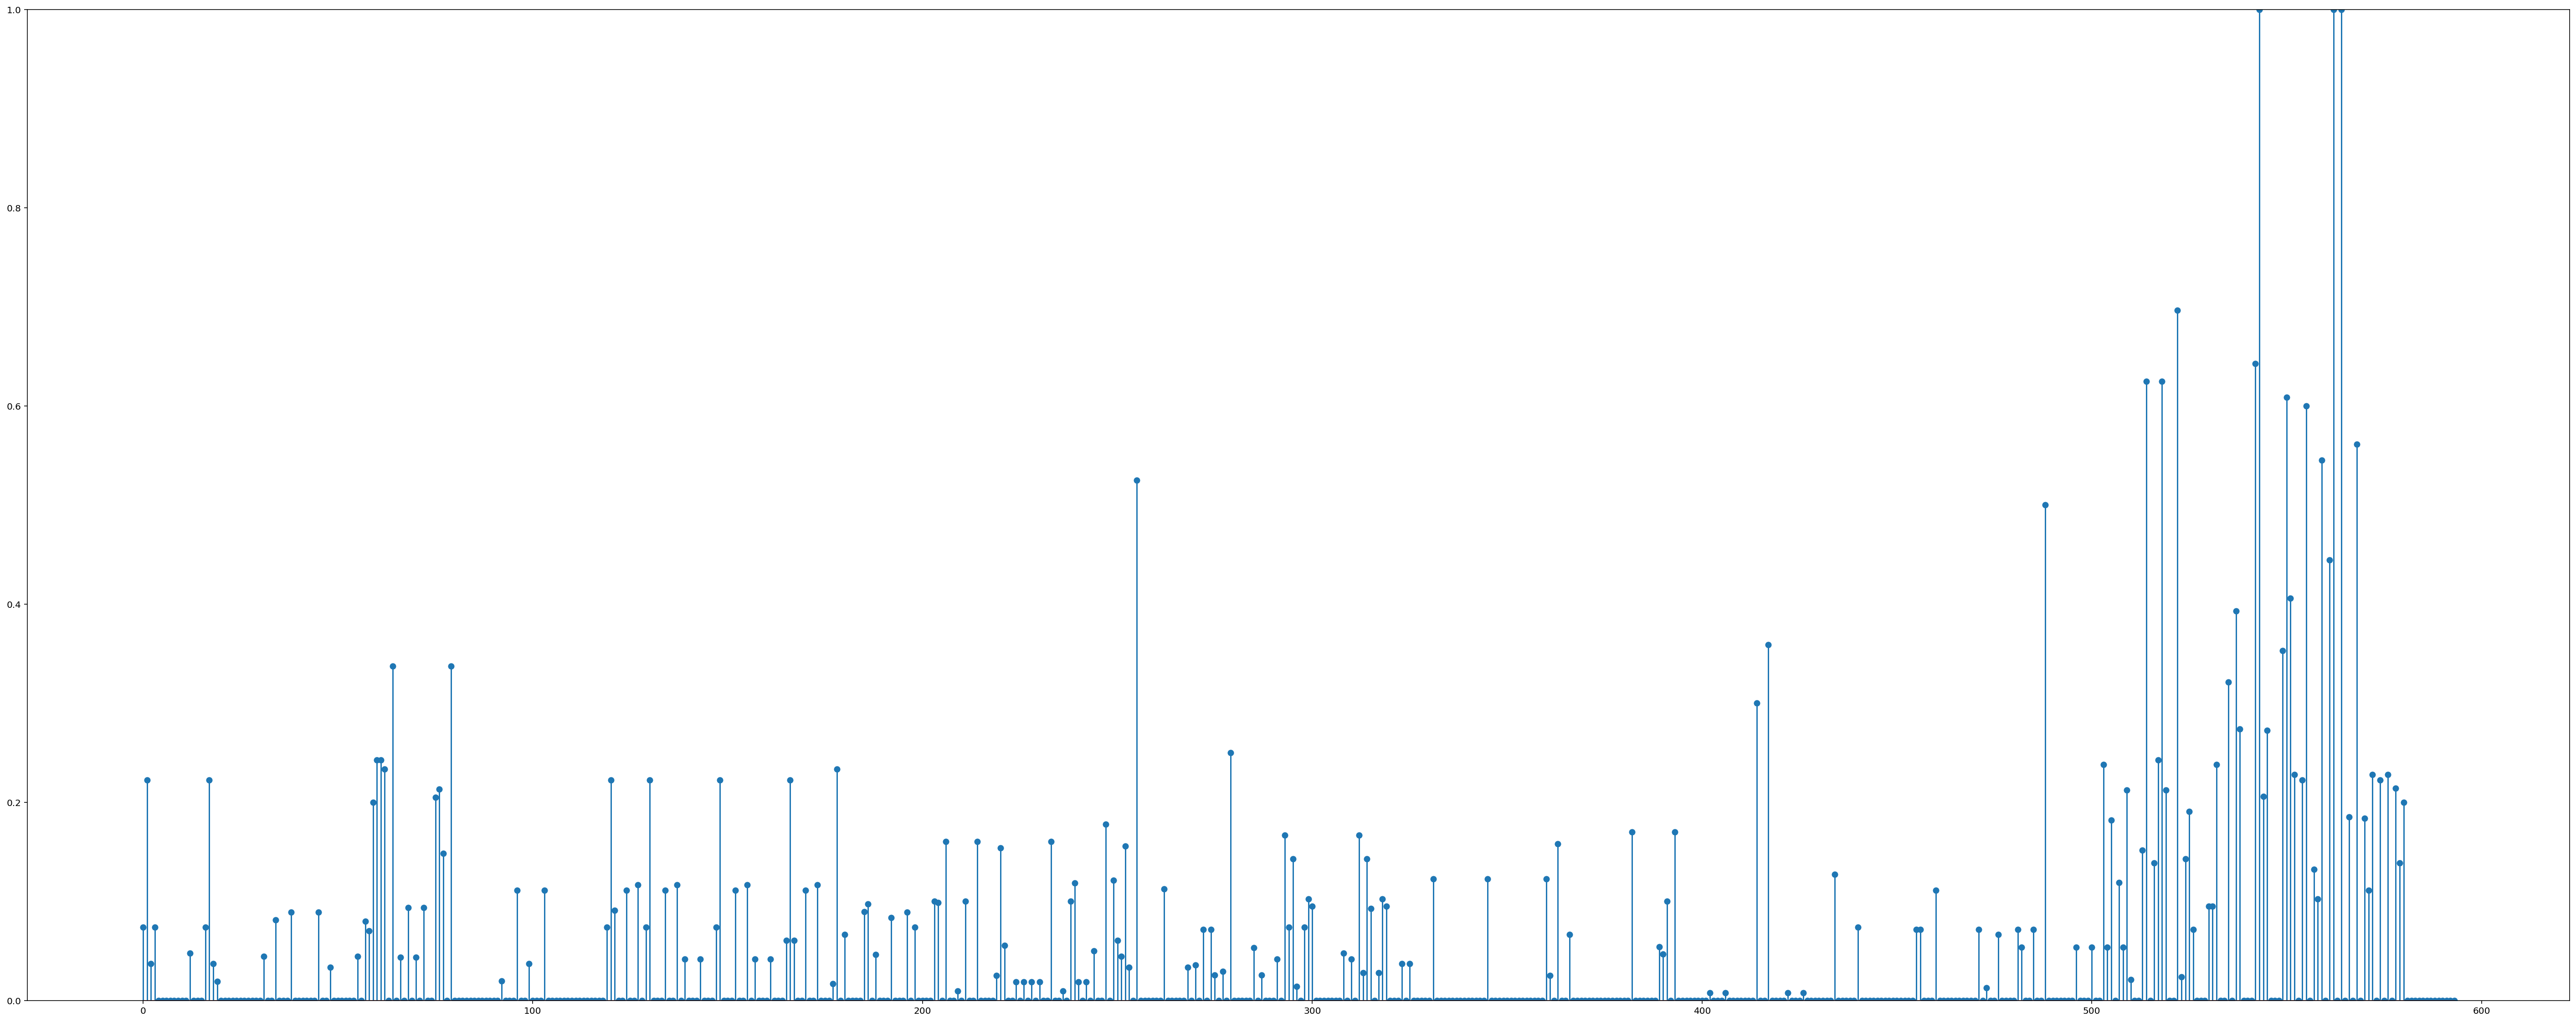

When-in-Rome/Corpus/Variations_and_Grounds/Mozart,_Wolfgang_Amadeus/_/K455/analysis_A.txt AlignedTavern/Mozart/K455.mxl
score:  30.726812952646757
(0.0, 2.0): I			0.07
(2.0, 4.0): V			0.22
(4.0, 6.0): vi			0.04
(6.0, 8.0): V			0.07
(8.0, 9.0): IV			0.0
(9.0, 10.0): viio			0.0
(10.0, 12.0): I			0.0
(12.0, 13.0): V7			0.0
(13.0, 16.0): I			0.0
(16.0, 18.0): V7/ii			0.0
(18.0, 20.0): i/ii			0.0
(20.0, 22.0): V/ii			0.0
(22.0, 24.0): ii			0.05
(24.0, 28.0): V7			0.0
(28.0, 30.0): V			0.0
(30.0, 32.0): I			0.0
(32.0, 34.0): I			0.07
(34.0, 36.0): V			0.22
(36.0, 38.0): vi			0.04
(38.0, 40.0): V			0.02
(40.0, 41.0): viio			0.0
(41.0, 42.0): viio			0.0
(42.0, 44.0): I			0.0
(44.0, 45.0): V7			0.0
(45.0, 48.0): I			0.0
(48.0, 50.0): I			0.0
(50.0, 52.0): V			0.0
(52.0, 54.0): viio/V			0.0
(54.0, 56.0): V			0.0
(56.0, 57.0): IV			0.0
(57.0, 58.0): IV			0.0
(58.0, 59.0): I			0.04
(59.0, 60.0): I			0.0
(60.0, 61.0): V			0.0
(61.0, 64.0): I			0.08
(64.0, 66.0): V7/ii			0.0
(66.0, 67.0): i/ii			0.0

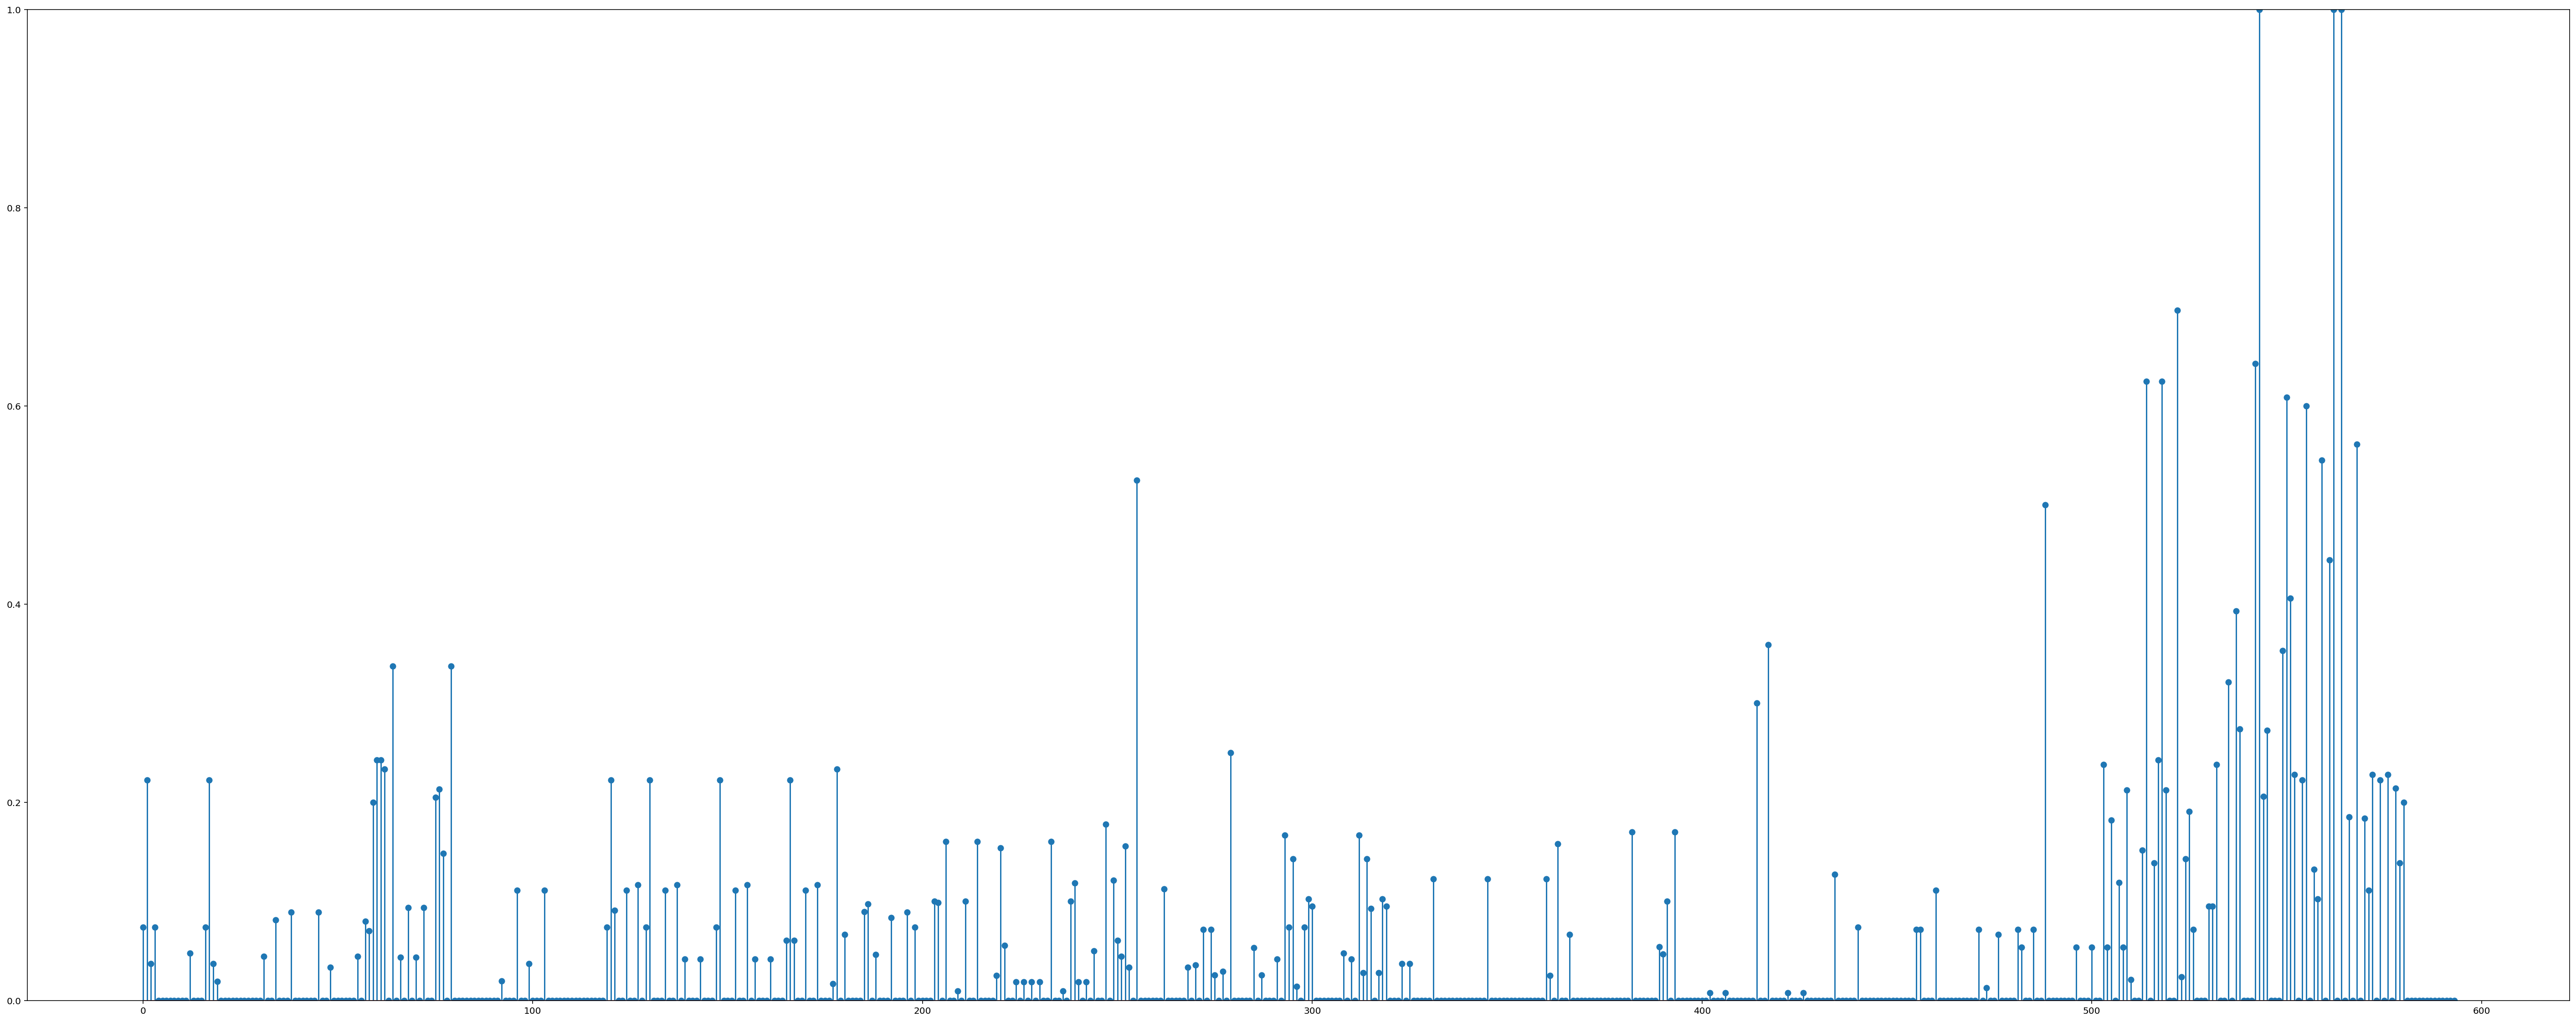

When-in-Rome/Corpus/Variations_and_Grounds/Mozart,_Wolfgang_Amadeus/_/K455/analysis_B.txt TAVERN/Mozart/K455/Krn/K455.krn
score:  128.11217287631703
(0.0, 2.0): I			0.07
(2.0, 4.0): V			0.22
(4.0, 6.0): vi			0.04
(6.0, 8.0): V			0.07
(8.0, 9.0): IV			0.0
(9.0, 10.0): viio			0.0
(10.0, 12.0): I			0.0
(12.0, 13.0): V7			0.0
(13.0, 16.0): I			0.0
(16.0, 18.0): V7/ii			0.0
(18.0, 20.0): i/ii			0.0
(20.0, 22.0): V/ii			0.0
(22.0, 24.0): ii			0.05
(24.0, 28.0): V7			0.0
(28.0, 30.0): V			0.0
(30.0, 32.0): I			0.0
(32.0, 34.0): I			0.07
(34.0, 36.0): V			0.22
(36.0, 38.0): vi			0.04
(38.0, 40.0): V			0.02
(40.0, 41.0): viio			0.0
(41.0, 42.0): viio			0.0
(42.0, 44.0): I			0.0
(44.0, 45.0): V7			0.0
(45.0, 48.0): I			0.0
(48.0, 50.0): I			0.0
(50.0, 52.0): V			0.0
(52.0, 54.0): viio/V			0.0
(54.0, 56.0): V			0.0
(56.0, 57.0): IV			0.0
(57.0, 58.0): IV			0.0
(58.0, 59.0): I			0.04
(59.0, 60.0): I			0.0
(60.0, 61.0): V			0.0
(61.0, 64.0): I			0.08
(64.0, 66.0): V7/ii			0.0
(66.0, 67.0): i/ii			0

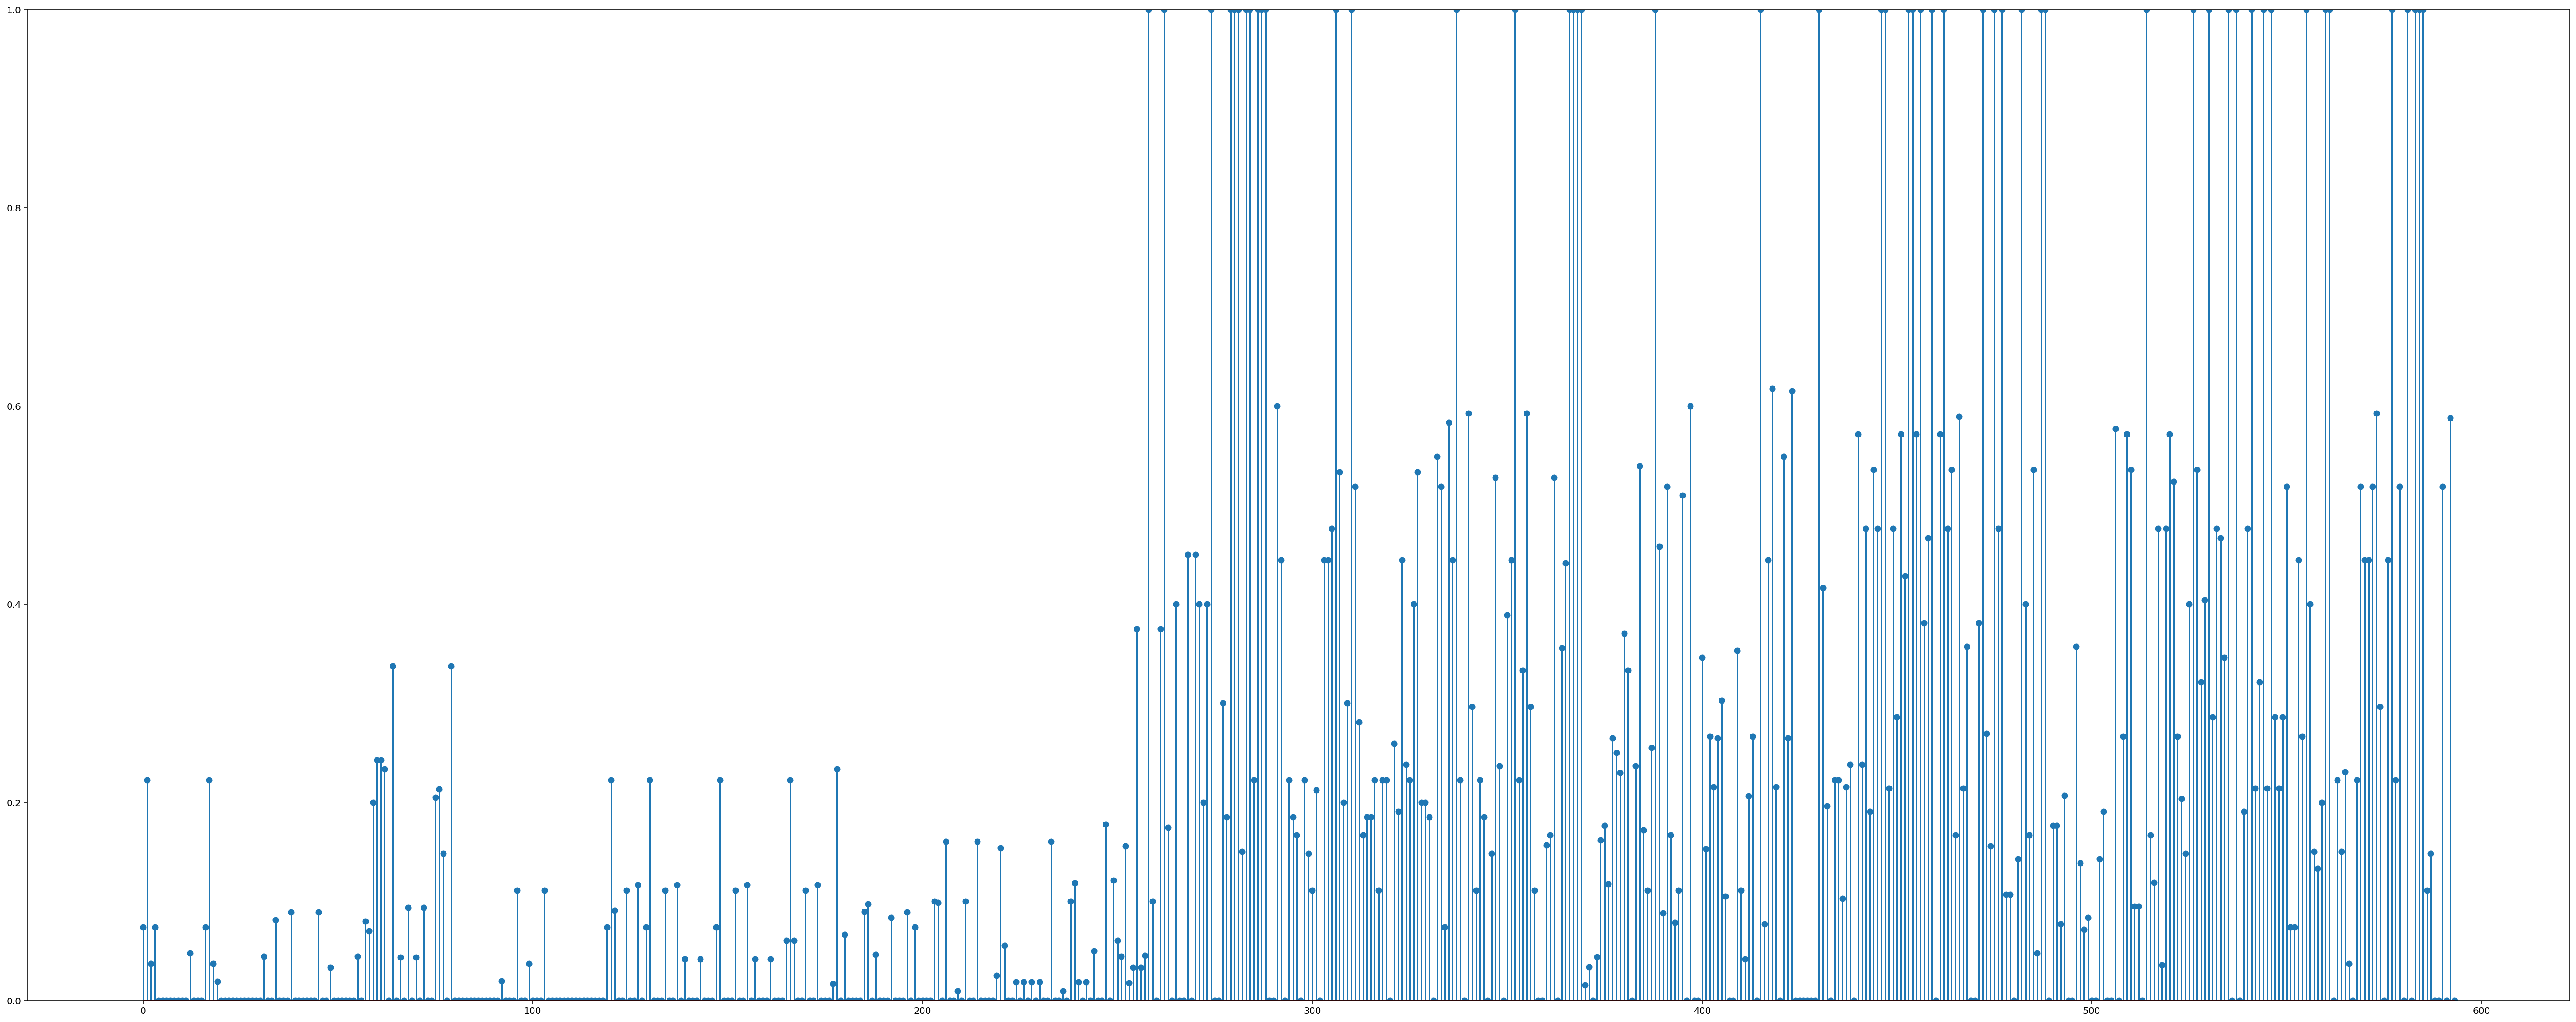

When-in-Rome/Corpus/Variations_and_Grounds/Mozart,_Wolfgang_Amadeus/_/K455/analysis_B.txt functional-harmony-micchi/data/Tavern/Mozart/scores/K455.mxl
score:  30.840449316283124
(0.0, 2.0): I			0.07
(2.0, 4.0): V			0.22
(4.0, 6.0): vi			0.04
(6.0, 8.0): V			0.07
(8.0, 9.0): IV			0.0
(9.0, 10.0): viio			0.0
(10.0, 12.0): I			0.0
(12.0, 13.0): V7			0.0
(13.0, 16.0): I			0.0
(16.0, 18.0): V7/ii			0.0
(18.0, 20.0): i/ii			0.0
(20.0, 22.0): V/ii			0.0
(22.0, 24.0): ii			0.05
(24.0, 28.0): V7			0.0
(28.0, 30.0): V			0.0
(30.0, 32.0): I			0.0
(32.0, 34.0): I			0.07
(34.0, 36.0): V			0.22
(36.0, 38.0): vi			0.04
(38.0, 40.0): V			0.02
(40.0, 41.0): viio			0.0
(41.0, 42.0): viio			0.0
(42.0, 44.0): I			0.0
(44.0, 45.0): V7			0.0
(45.0, 48.0): I			0.0
(48.0, 50.0): I			0.0
(50.0, 52.0): V			0.0
(52.0, 54.0): viio/V			0.0
(54.0, 56.0): V			0.0
(56.0, 57.0): IV			0.0
(57.0, 58.0): IV			0.0
(58.0, 59.0): I			0.04
(59.0, 60.0): I			0.0
(60.0, 61.0): V			0.0
(61.0, 64.0): I			0.08
(64.0, 66.0): V7/ii

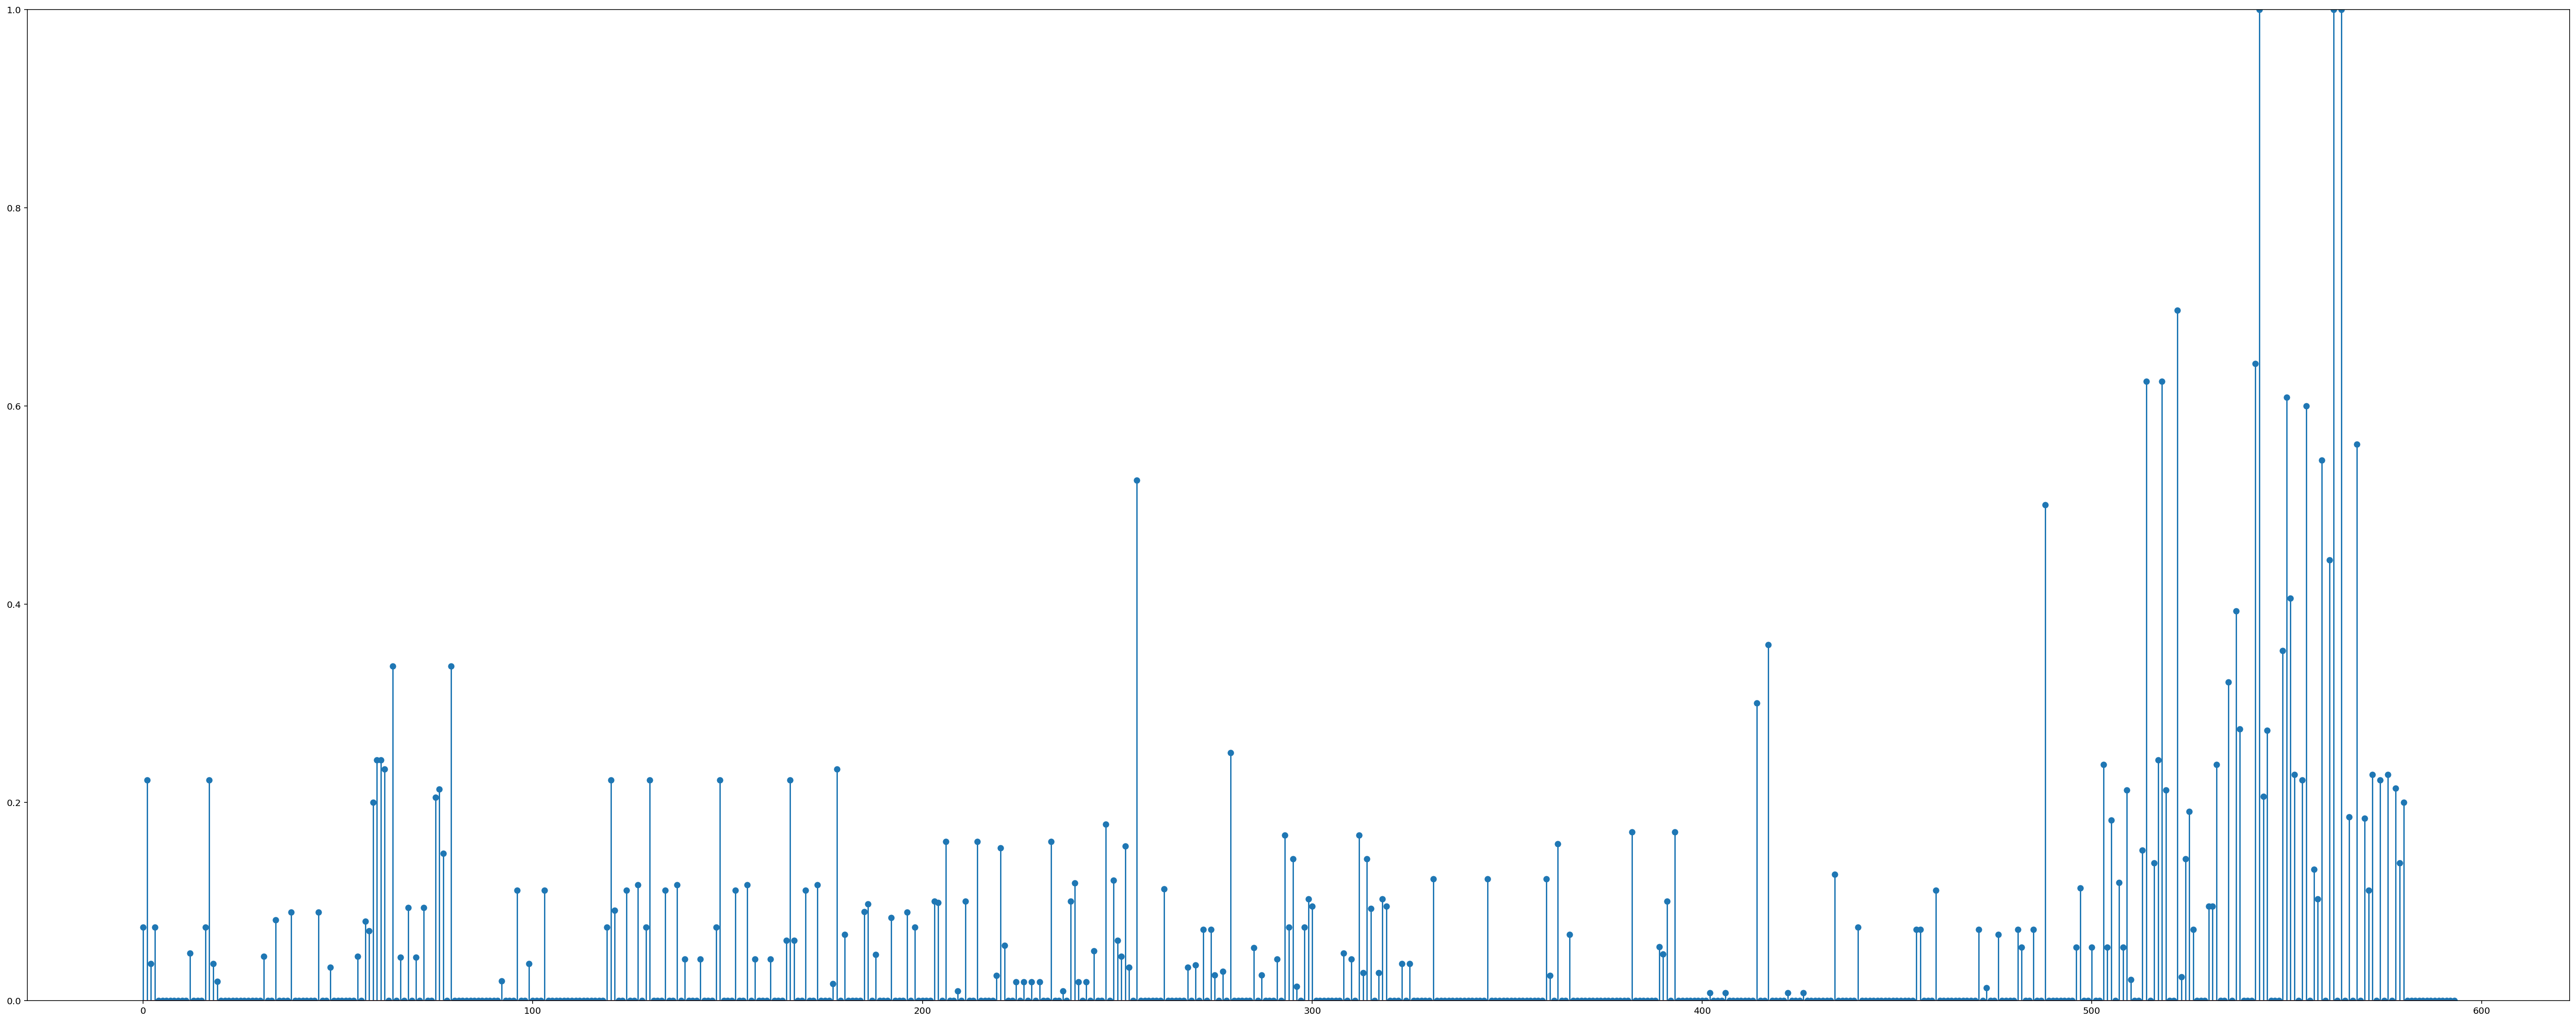

When-in-Rome/Corpus/Variations_and_Grounds/Mozart,_Wolfgang_Amadeus/_/K455/analysis_B.txt AlignedTavern/Mozart/K455.mxl
score:  30.840449316283124
(0.0, 2.0): I			0.07
(2.0, 4.0): V			0.22
(4.0, 6.0): vi			0.04
(6.0, 8.0): V			0.07
(8.0, 9.0): IV			0.0
(9.0, 10.0): viio			0.0
(10.0, 12.0): I			0.0
(12.0, 13.0): V7			0.0
(13.0, 16.0): I			0.0
(16.0, 18.0): V7/ii			0.0
(18.0, 20.0): i/ii			0.0
(20.0, 22.0): V/ii			0.0
(22.0, 24.0): ii			0.05
(24.0, 28.0): V7			0.0
(28.0, 30.0): V			0.0
(30.0, 32.0): I			0.0
(32.0, 34.0): I			0.07
(34.0, 36.0): V			0.22
(36.0, 38.0): vi			0.04
(38.0, 40.0): V			0.02
(40.0, 41.0): viio			0.0
(41.0, 42.0): viio			0.0
(42.0, 44.0): I			0.0
(44.0, 45.0): V7			0.0
(45.0, 48.0): I			0.0
(48.0, 50.0): I			0.0
(50.0, 52.0): V			0.0
(52.0, 54.0): viio/V			0.0
(54.0, 56.0): V			0.0
(56.0, 57.0): IV			0.0
(57.0, 58.0): IV			0.0
(58.0, 59.0): I			0.04
(59.0, 60.0): I			0.0
(60.0, 61.0): V			0.0
(61.0, 64.0): I			0.08
(64.0, 66.0): V7/ii			0.0
(66.0, 67.0): i/ii			0.0

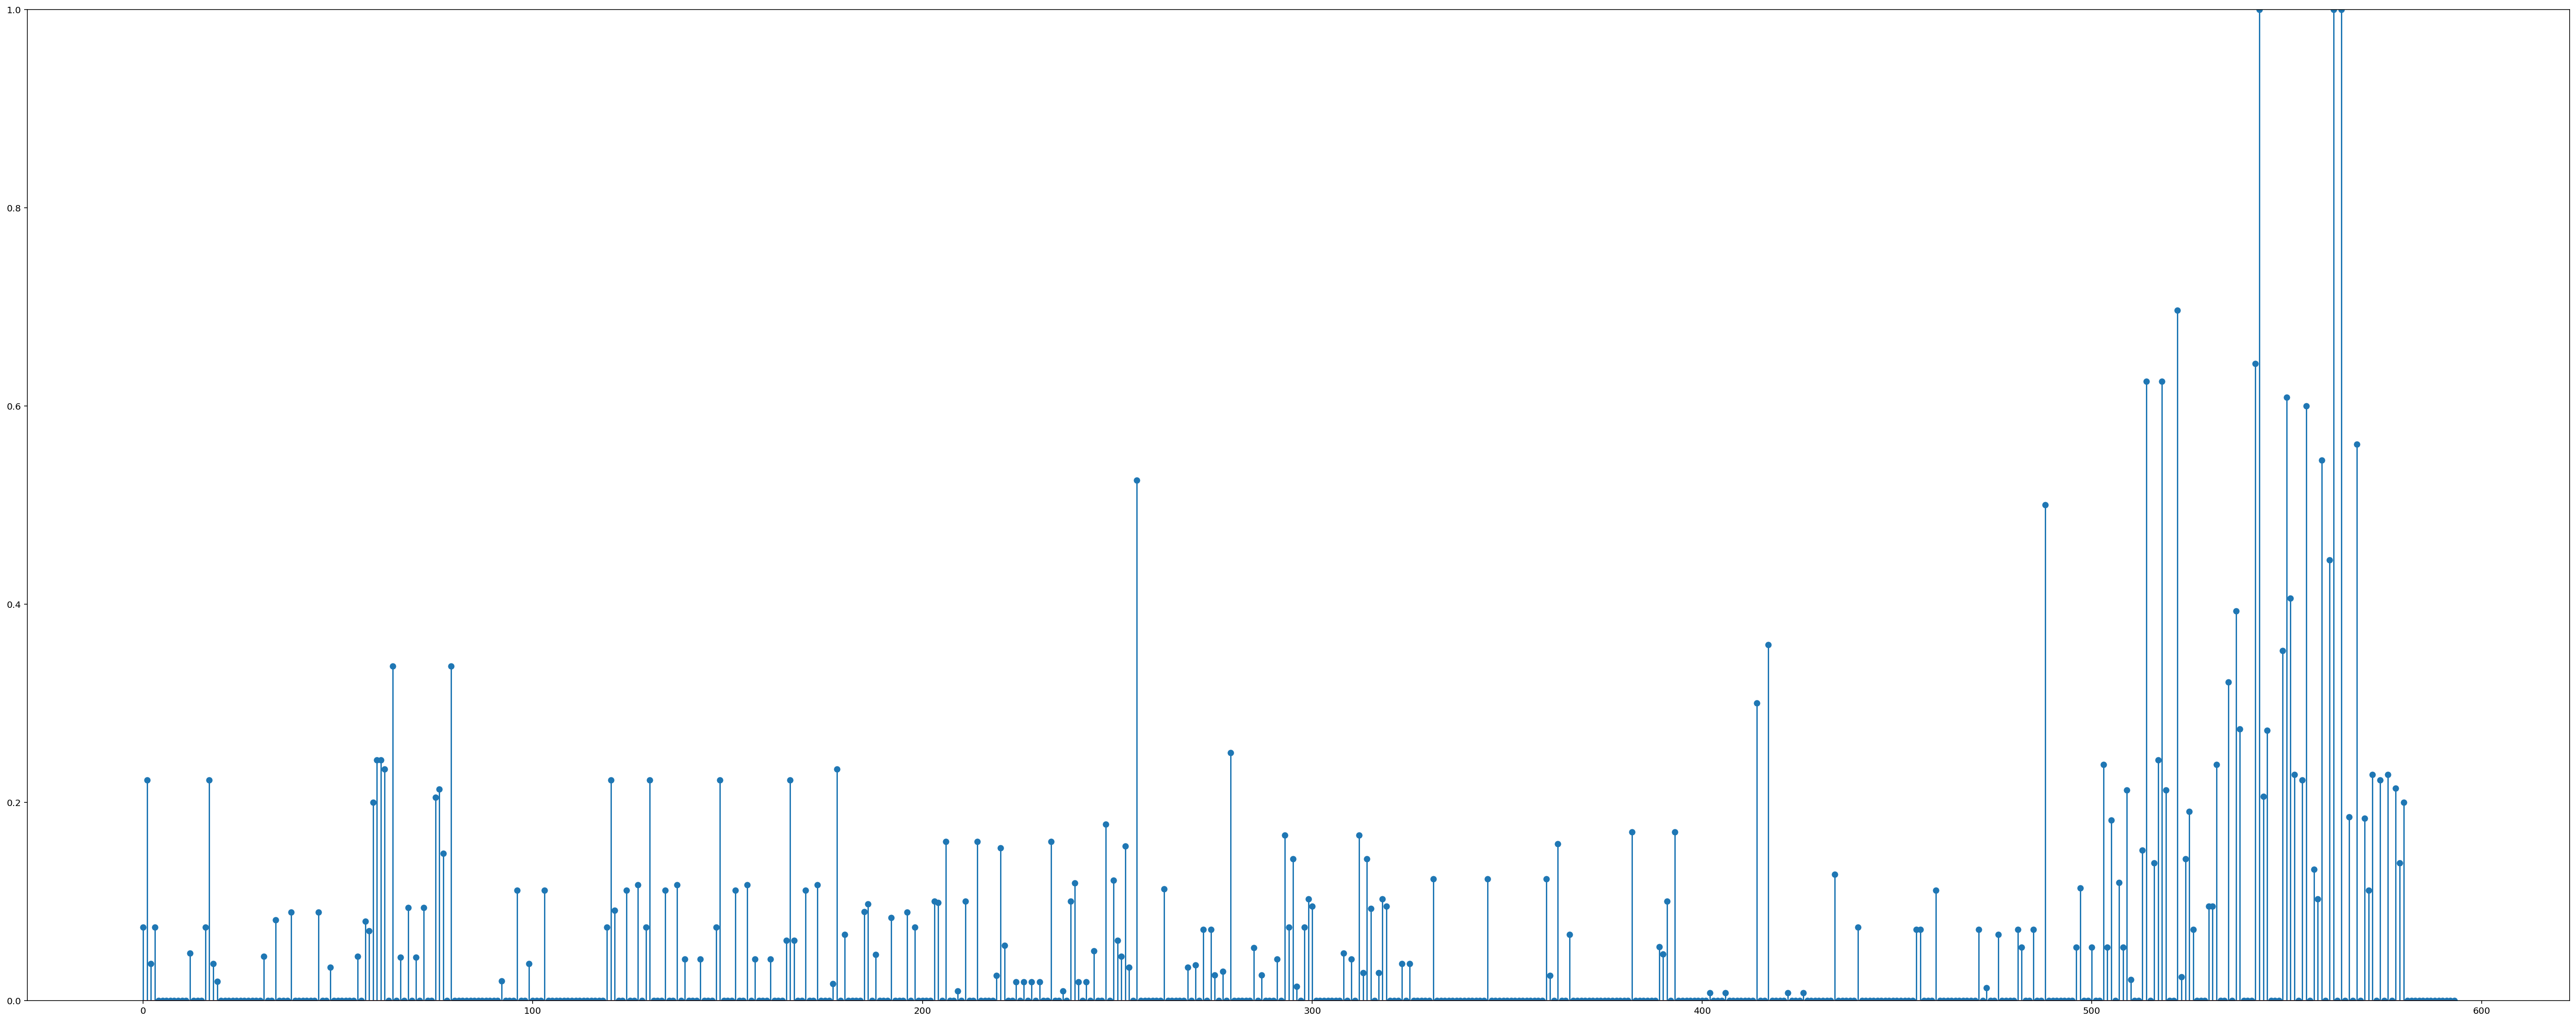

In [4]:
for annotation, scoreVersions in TAVERNVERSIONS.items():
    for version, score in scoreVersions.items():
        if "K455" not in annotation:
            continue
        print(annotation, score)
        try:
            a = parseAnnotation(annotation)
            s = parseScore(score)
        except:
            print("\tFAILED")
            pass
            continue
        annotationRanges = getAnnotationOffsets(a)
        try:
            nonChordToneSequence = getNonChordSequence(annotationRanges, s)
        except:
            print("\tFAILED TO COMPUTE NONCHORD")
            pass
            continue
        print("score: ", sum(nonChordToneSequence))
        for i in range(len(nonChordToneSequence)):
            start, end, notes, rn = annotationRanges[i]
            ncScore = nonChordToneSequence[i]
            print(f"({start}, {end}): {rn}\t\t\t{round(ncScore, 2)}")
        plt.figure(figsize=(50, 20))
        plt.ylim(0.0, 1.0)
        plt.stem(range(len(nonChordToneSequence)), nonChordToneSequence)
        plt.show()
